In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import spectrogram, welch, butter, sosfiltfilt
from scipy.fft import fftshift
from scipy.io import wavfile
from matplotlib.colors import NoNorm

%matplotlib inline

In [412]:
fs, x = wavfile.read('ch4_T0000001.WAV')

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: WavFileWarning: Chunk (non-data) not understood, skipping it.
  """Entry point for launching an IPython kernel.


In [413]:
sos = butter(4, (20000,120000), btype='bandpass', output='sos',fs=fs)

In [414]:
x_filt = sosfiltfilt(sos, x)

In [415]:
def gen_psd(call_start:int):
    rec_start = 1381582.903
    spec_begin = (call_start - rec_start) * 250
    spec_end = spec_begin + 30000
    f, Pxx = welch(x_filt[int(spec_begin):int(spec_end)], fs, window='blackmanharris', nperseg=500, noverlap=400, nfft=500)
    plt.plot(f, Pxx)
    plt.ylabel('PSD [V**2/Hz]')
    plt.xlabel('Frequency [Hz]')
    print('Max PSD:',Pxx.max())
    print('Min PSD:',Pxx.min())
    # plt.axis('off')   

In [416]:
def gen_spec(call_start:int):
    rec_start = 1381582.903
    spec_begin = (call_start - rec_start) * 250
    spec_end = spec_begin + 30000
    f, t, Sxx = spectrogram(x_filt[int(spec_begin):int(spec_end)], fs, nfft=500, noverlap=400, nperseg=500, window='blackmanharris')
    plt.pcolormesh(t, f, Sxx, cmap='gray_r',norm=NoNorm())
    plt.ylabel('Frequency [Hz]')
    plt.xlabel('Time [s]')
    #plt.axis('off')   

Max PSD: 0.18341943339211927
Min PSD: 3.385417865595262e-13


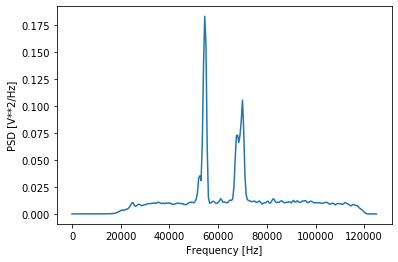

In [417]:
gen_psd(1827190.25)

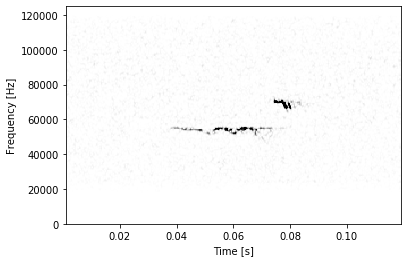

In [418]:
gen_spec(1827190.25)